<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="GL-2.png">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [2]:
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns

# to ignore the warnings run the following code
import warnings
warnings.filterwarnings("ignore")

# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

#### Read the data

Load the csv file and print the first five observations.

In [17]:
df=pd.read_csv('Nutrients.csv')
df.head(5)

,Food,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron
0,Honeydew_Melon,36,0.14,18,228,9.00,0.54,34.00,18.0,6.0,0.17
1,Potato,77,0.09,6,421,17.00,2.00,1.34,19.7,12.0,0.78
2,Sweet Corn,86,1.18,15,270,19.00,3.20,0.00,6.8,2.0,0.52
3,Celery,16,0.17,80,260,2.79,0.69,0.00,3.1,40.0,0.20
4,Pomegranates,83,1.17,3,236,18.70,1.67,0.00,10.2,10.0,0.30


The first column in the dataset corresponds to the different food items and the remaining columns record the amount of nutrients present in that food.

**The data definition is as follows:** <br>

**Food**: Name of the food item

**Calories**: Calories present in the food (in kcal)

**Fat**: Fat present in the food (in g)

**Sodium**: Sodium present in the food (in mg)

**Potassium**: Potassium present in the food (in mg)	

**Carbohydrate**: Carbohydrate present in the food (in g)	

**Protein**: Protein present in the food (in g)

**Vitamin A**: Vitamin A present in the food (in mg)	

**Vitamin C**: Vitamin C present in the food (in mg)

**Calcium**: Calcium present in the food (in mg)

**Iron**: Iron present in the food (in mg)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Set the name of the food item as the identifier for each observation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [18]:
df.Food.value_counts()
df.drop(columns=['Food'],inplace=True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Plot the distribution of all the numerical variables and identify the type of skewness.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

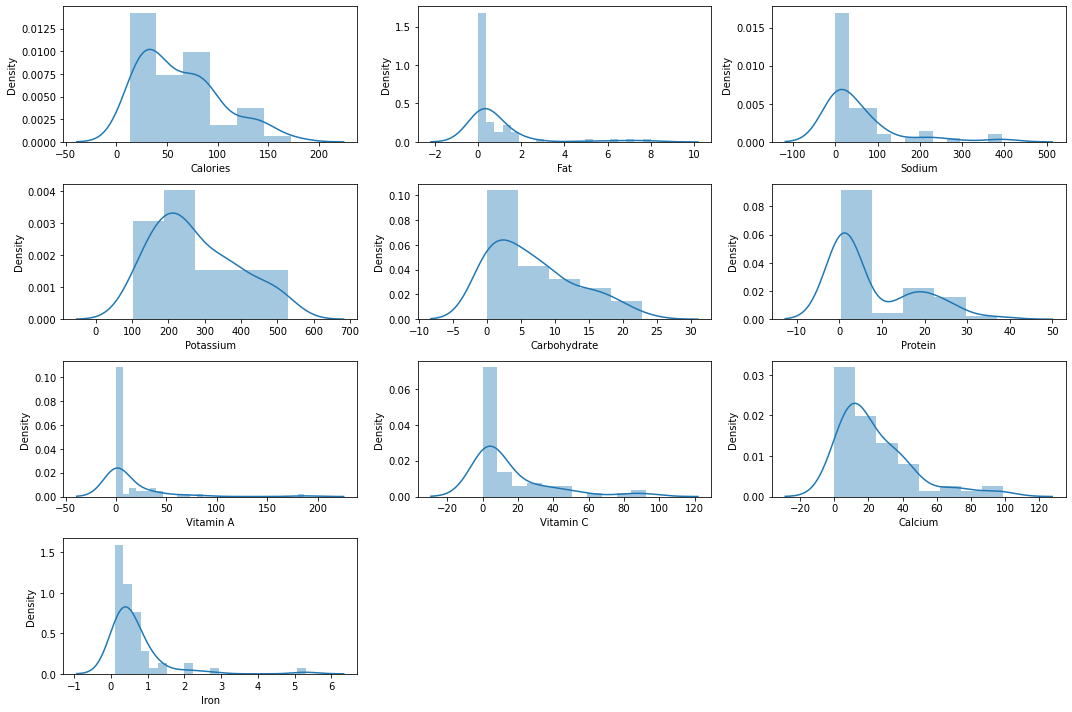

In [19]:
n=1
plt.figure(figsize=(15,10))
for i in df.columns:
    if df[i].dtypes!='object':
        plt.subplot(4,3,n)
        n+=1
        sns.distplot(df[i])
        plt.tight_layout()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Plot the correlation between the various nutrients. And find the variables with the strongest correlation.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:>

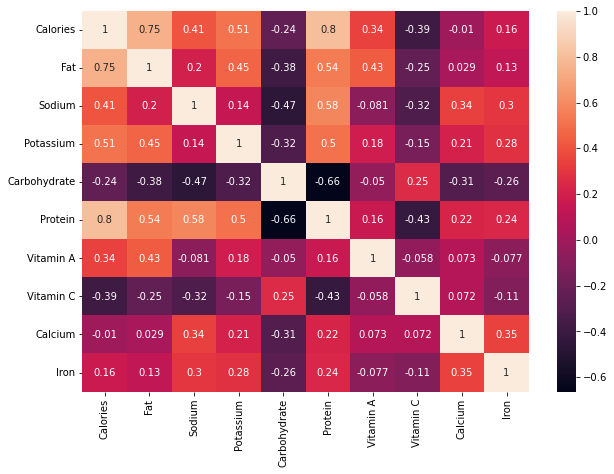

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Perform the appropriate normalization technique to transform the variables to have minimum 0 and maximum 1 value.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()

In [22]:
num=mm.fit_transform(df)

In [23]:
df=pd.DataFrame(data=num,columns=df.columns)

In [24]:
df.head(4)

,Calories,Fat,Sodium,Potassium,Carbohydrate,Protein,Vitamin A,Vitamin C,Calcium,Iron
0,0.144654,0.01750,0.045570,0.295775,0.394046,0.007621,0.181818,0.194175,0.060606,0.013462
1,0.402516,0.01125,0.015190,0.748826,0.744308,0.047360,0.007166,0.212513,0.121212,0.130769
2,0.459119,0.14750,0.037975,0.394366,0.831874,0.080022,0.000000,0.073355,0.020202,0.080769
3,0.018868,0.02125,0.202532,0.370892,0.122154,0.011704,0.000000,0.033441,0.404040,0.019231


In [25]:
df.shape

(61, 10)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Create a dictionary to store the cophenetic correlation coefficient for the following linkage methods: 'Single', 'Complete', and 'Average'. Identify which linkage method works best in quantifying the dissimilarities between the observations.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:
met=['single', 'complete', 'average']
for i in met:
    link_mat = linkage(df, method = i)
    eucli_dist = euclidean_distances(df)
    dist_array = eucli_dist[np.triu_indices(61, k = 1)]
    coeff, cophenet_dist = cophenet(link_mat, dist_array)
    print('coeffi of linkage {} is {}'.format(i,coeff))

coeffi of linkage single is 0.7909583288433946
coeffi of linkage complete is 0.7750472694670165
coeffi of linkage average is 0.8511247911173969


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Plot the dendrogram using the 'ward' linkage method and decide the optimal number of clusters. 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [40]:
link_mat=linkage(df,method='ward')

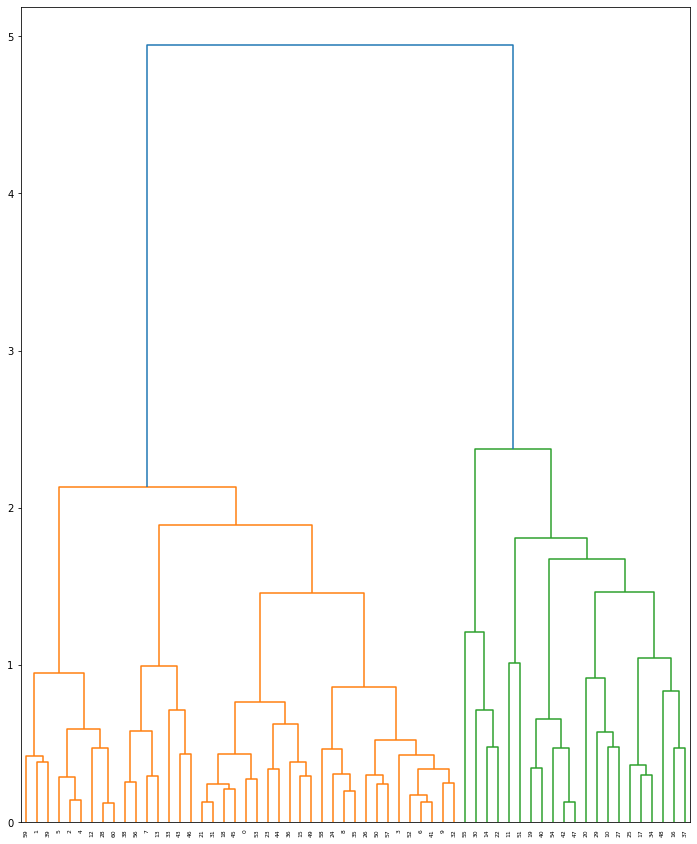

<Figure size 432x288 with 0 Axes>

In [34]:
plt.figure(figsize=(12,15))
import plotly.figure_factory as ff
hierarchy.dendrogram(link_mat)
plt.figure()
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Build the optimal number of clusters as per the previous question and interpret them.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
n_cl=[2,3,4,5]

for i in n_cl:
    clusters = AgglomerativeClustering(n_clusters=i, linkage='ward')
    predict=clusters.fit_predict(df)
    score=silhouette_score(df,predict)
    print('Cluster {} score is {}'.format(i,score))

Cluster 2 score is 0.3891017411156525
Cluster 3 score is 0.3707095083316523
Cluster 4 score is 0.2381768009203532
Cluster 5 score is 0.24007500103047527


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Perform a DBSCAN algorithm, where a point is in the neighborhood of another point if the euclidean distance between them is less than 0.6, and a core point should have at least 2 points in its neighborhood (excluding itself). And find the number of data points in each cluster.  </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [36]:
model = DBSCAN(eps = 0.6, min_samples =3)

# fit the model on the scaled data
model.fit(df)

DBSCAN(eps=0.6, min_samples=3)

In [37]:
df1=df.copy()

In [38]:
df1['Cluster']=model.labels_

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Interpret the outliers identified by DBSCAN algorithm.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [39]:
df1['Cluster'].value_counts()

 0    40
 1    16
-1     5
Name: Cluster, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Visualize the clusters formed using hierarchical clustering and DBSCAN.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [42]:
df['Cluster']=clusters.labels_

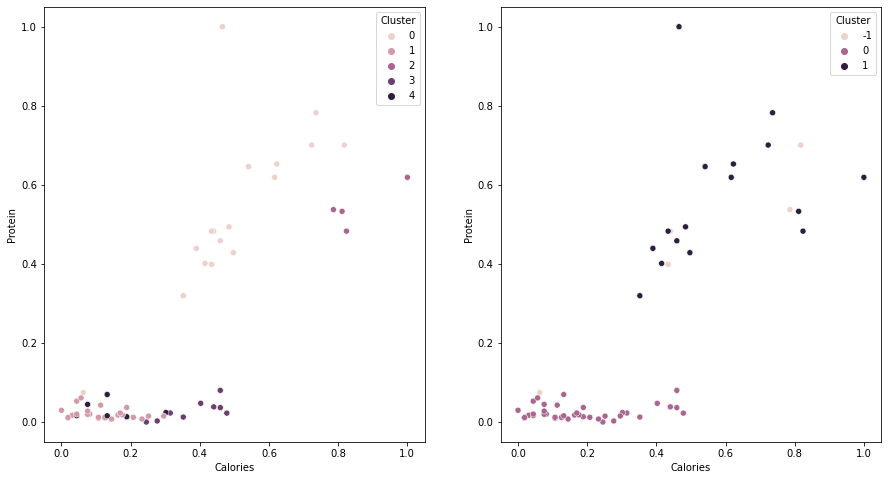

In [53]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x='Calories',y='Protein',hue='Cluster',data=df)
plt.subplot(1,2,2)
sns.scatterplot(x='Calories',y='Protein',hue='Cluster',data=df1)
plt.show()